# Feature Selection

### 1.1 Import Data and Required Packages

Importing necessary libraries like Pandas, Numpy, Matplotlib, Seaborn and Sklearn Library for data manipulation, visualization, and machine learning

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from tabulate import tabulate
from sklearn.decomposition import PCA

### 1.2 Load Dataset

Load the dataset from a CSV file and display the first 10 rows

In [38]:
# Load the dataset
file_path = 'data_modified.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(tabulate(data.head(10), headers='keys', tablefmt='pretty'))

+---+-----+-----------------+------------+----------------------+----------+-----------------+----------------+-------------------+----------------+----------------------+--------------------+--------+--------------------------------+---------+-----------+-----------------+---------+
|   | Age | Education_Level | Occupation | Number_of_Dependents | Location | Work_Experience | Marital_Status | Employment_Status | Household_Size | Homeownership_Status |  Type_of_Housing   | Gender | Primary_Mode_of_Transportation | Income  | Age_Group | Income_Category | Cluster |
+---+-----+-----------------+------------+----------------------+----------+-----------------+----------------+-------------------+----------------+----------------------+--------------------+--------+--------------------------------+---------+-----------+-----------------+---------+
| 0 | 56  |    Master's     | Technology |          5           |  Urban   |       21        |    Married     |     Full-time     |       7      

### 1.3 Check for Missing Values

Check for missing values in the dataset and print them. 

In [3]:
# Checking for missing values
missing_values = data.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
Age_Group                         0
Income_Category                   0
Cluster                           0
dtype: int64


### 1.4 Handle Missing Values
Drop rows with any missing values in the dataset.

In [4]:
# Fill missing values or drop columns with too many missing values
data = data.dropna()  # For simplicity, we drop rows with missing values

### 1.5 Display Cleaned Dataset
Display the first few rows of the cleaned dataset

In [5]:
# Display the cleaned dataset
print("\nCleaned dataset head:")
data.head()


Cleaned dataset head:


,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income,Age_Group,Income_Category,Cluster
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510,46-60,Medium,2
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462,61-75,Medium,2
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748,46-60,Medium,2
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520,31-45,Medium,1
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210,46-60,High,2


### 1.6 Prepare Data for Encoding
Copy the data to avoid modifying the original dataset during encoding.

In [6]:
# Copy the data to avoid modifying the original dataset
data_encoded = data.copy()

### 1.7 Encode Categorical Variables
Identify categorical columns and initialize LabelEncoders for each categorical column

In [7]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns

In [8]:
for column in categorical_columns:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])
    label_encoders[column] = le

### 1.8 Calculate and Plot Correlation Matrix
Calculate the correlation matrix for the encoded dataset and plot it using seaborn.

In [9]:
# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

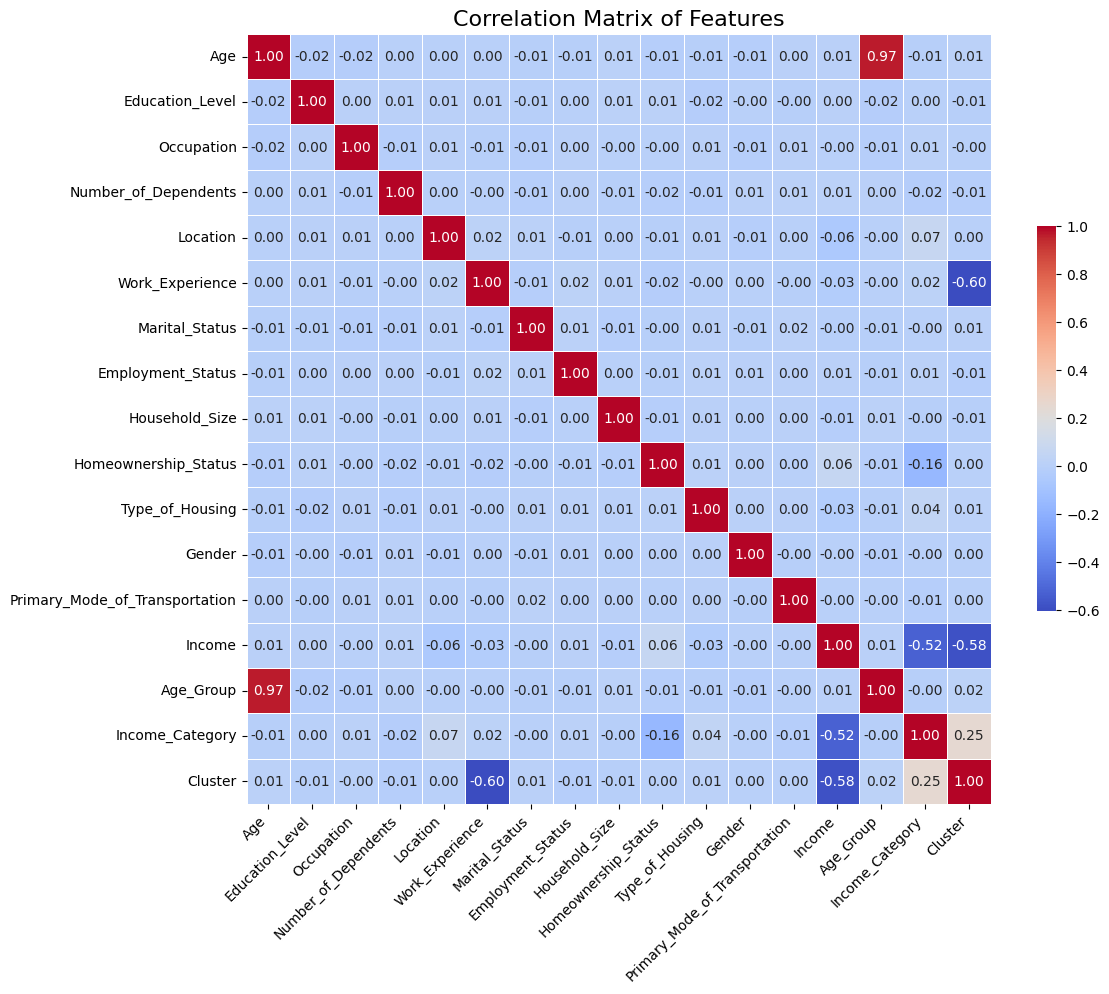

In [11]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .5})

# Set titles and labels
plt.title('Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()

### 1.9 Display Correlation with Income

In [10]:
# Extract the correlation with the target variable 'Income'
income_correlation = correlation_matrix["Income"].sort_values(ascending=False)
income_correlation

Income                            1.000000
Homeownership_Status              0.062561
Number_of_Dependents              0.011413
Age                               0.008739
Age_Group                         0.006974
Employment_Status                 0.006549
Education_Level                   0.003974
Primary_Mode_of_Transportation   -0.000655
Occupation                       -0.001380
Gender                           -0.002218
Marital_Status                   -0.003970
Household_Size                   -0.011356
Type_of_Housing                  -0.026367
Work_Experience                  -0.027541
Location                         -0.055916
Income_Category                  -0.524863
Cluster                          -0.583223
Name: Income, dtype: float64

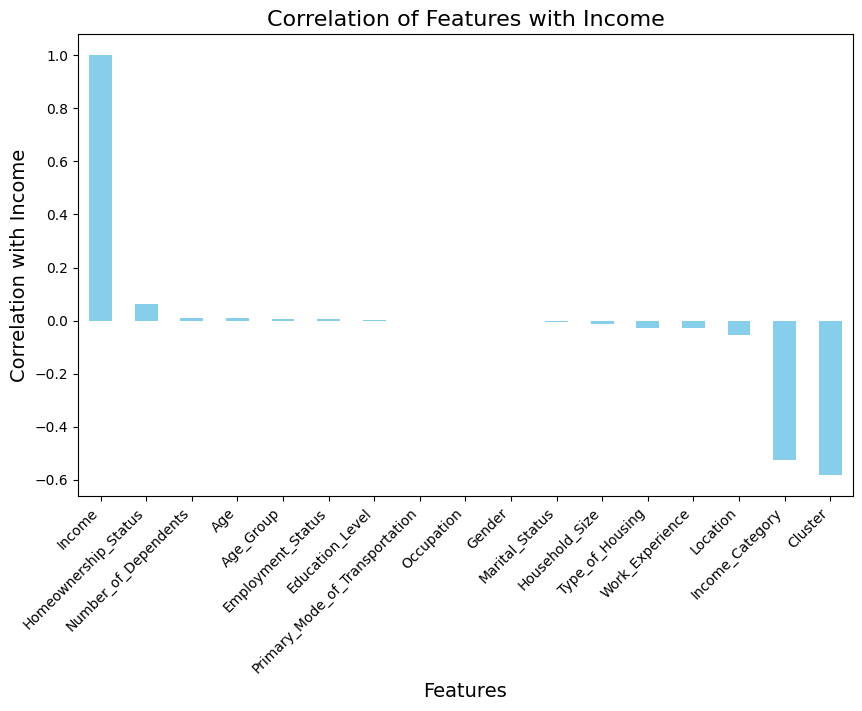

In [12]:
# Plot the correlation with the target variable 'Income'
plt.figure(figsize=(10, 6))
income_correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Income', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation with Income', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

### 1.10 Perform PCA

In [13]:
# Standardize the data
scaler = StandardScaler()
data_encoded_scaled = scaler.fit_transform(data_encoded.drop(columns=['Income']))

In [14]:
# Perform PCA
pca = PCA()
pca.fit(data_encoded_scaled)

PCA()

In [15]:
# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

In [16]:
explained_variance_ratio

array([0.12304626, 0.1031351 , 0.07382906, 0.06478272, 0.06405769,
       0.06387873, 0.06353211, 0.06266187, 0.06229839, 0.06222814,
       0.06135946, 0.06018085, 0.05993897, 0.05192762, 0.02098729,
       0.00215574])

In [17]:
# Cumulative variance explained
cumulative_variance_explained = explained_variance_ratio.cumsum()
cumulative_variance_explained

array([0.12304626, 0.22618136, 0.30001042, 0.36479314, 0.42885082,
       0.49272955, 0.55626167, 0.61892353, 0.68122192, 0.74345006,
       0.80480953, 0.86499038, 0.92492935, 0.97685697, 0.99784426,
       1.        ])

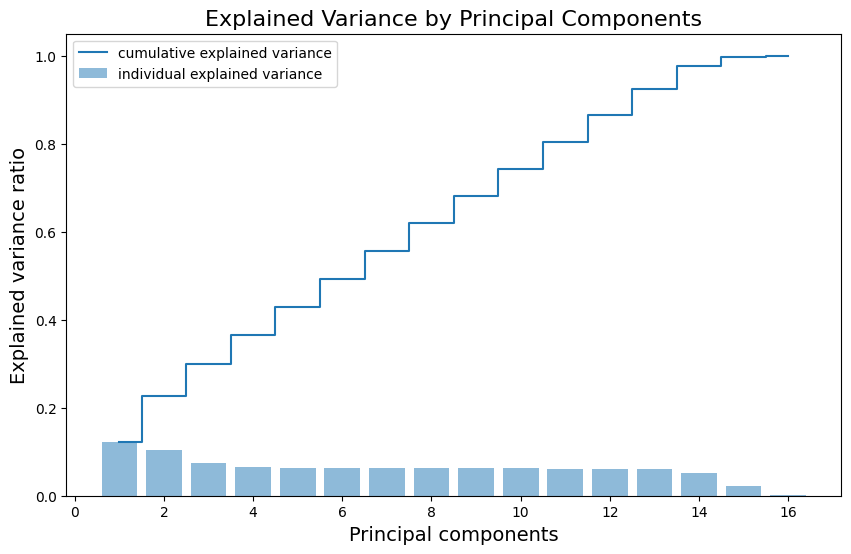

In [18]:
# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance_explained) + 1), cumulative_variance_explained, where='mid', label='cumulative explained variance')
plt.xlabel('Principal components', fontsize=14)
plt.ylabel('Explained variance ratio', fontsize=14)
plt.title('Explained Variance by Principal Components', fontsize=16)
plt.legend(loc='best')
plt.show()

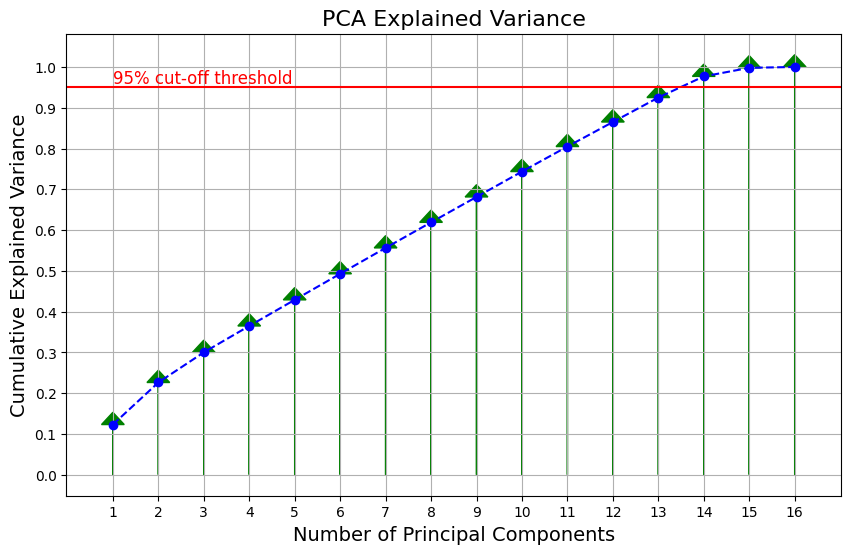

In [19]:
# Plot the explained variance as engine vectors
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_explained) + 1), cumulative_variance_explained, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('PCA Explained Variance', fontsize=16)
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(1, 0.96, '95% cut-off threshold', color = 'red', fontsize=12)
plt.xticks(range(1, len(cumulative_variance_explained) + 1))
plt.yticks([i/10 for i in range(11)])

# Add arrows for the first few principal components
for i, (variance, cum_variance) in enumerate(zip(explained_variance_ratio, cumulative_variance_explained), start=1):
    plt.arrow(i, 0, 0, cum_variance, head_width=0.5, head_length=0.03, fc='g', ec='g')

plt.show()


In [20]:
# Prepare a dataframe for better visualization
pca_results = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Variance Explained': cumulative_variance_explained
})

In [21]:
pca_results

,Principal Component,Explained Variance Ratio,Cumulative Variance Explained
0,PC1,0.123046,0.123046
1,PC2,0.103135,0.226181
2,PC3,0.073829,0.300010
3,PC4,0.064783,0.364793
4,PC5,0.064058,0.428851
5,PC6,0.063879,0.492730
6,PC7,0.063532,0.556262
7,PC8,0.062662,0.618924
8,PC9,0.062298,0.681222
9,PC10,0.062228,0.743450


### 2.1 Initialize PolynomialFeatures
### 2.2 Fit and Transform Data

In [22]:
# Creating interaction features and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(data_encoded.drop(columns=['Income']))

### 2.3 Convert to DataFrame

In [24]:
# Convert to DataFrame for easy handling
poly_feature_names = poly.get_feature_names_out(data_encoded.columns.drop('Income'))
poly_features_df = pd.DataFrame(poly_features, columns=poly_feature_names)

### 2.4 Add Target Variable

In [26]:
# Add the target variable back to the DataFrame
poly_features_df['Income'] = data_encoded['Income']

In [27]:
# Display the first few rows of the new DataFrame with interaction and polynomial features
poly_features_df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,...,Gender Age_Group,Gender Income_Category,Gender Cluster,Primary_Mode_of_Transportation Age_Group,Primary_Mode_of_Transportation Income_Category,Primary_Mode_of_Transportation Cluster,Age_Group Income_Category,Age_Group Cluster,Income_Category Cluster,Income
0,56.0,3.0,4.0,5.0,2.0,21.0,1.0,0.0,7.0,0.0,...,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,72510
1,69.0,2.0,1.0,0.0,2.0,4.0,2.0,0.0,7.0,0.0,...,3.0,2.0,2.0,0.0,0.0,0.0,6.0,6.0,4.0,75462
2,46.0,0.0,4.0,1.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0.0,0.0,0.0,2.0,2.0,2.0,4.0,4.0,4.0,71748
3,32.0,2.0,3.0,2.0,2.0,32.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,2.0,74520
4,60.0,0.0,1.0,3.0,2.0,15.0,1.0,2.0,4.0,0.0,...,2.0,0.0,2.0,6.0,0.0,6.0,0.0,4.0,0.0,640210


### 3.1 Define Features and Target Variable

In [28]:
# Define the features and target variable
X = poly_features_df.drop(columns=['Income'])
y = poly_features_df['Income']

### 3.2 Initialize and Train Random Forest Regressor

In [29]:
# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

### 3.3 Extract Feature Importances

In [30]:
# Get feature importances
feature_importances = rf.feature_importances_

In [31]:
feature_importances

array([1.54488878e-03, 2.63667846e-04, 4.59877887e-04, 5.36790940e-04,
       2.12092027e-04, 2.22467019e-03, 1.04287517e-04, 1.49632566e-04,
       7.77358181e-04, 4.02386051e-05, 1.80327855e-04, 6.11934388e-05,
       2.06356158e-04, 1.17834991e-04, 1.27641928e-02, 2.30837507e-01,
       2.46551629e-03, 3.38298610e-03, 3.68590650e-03, 3.25415866e-03,
       5.48294758e-03, 3.91927307e-03, 2.07582609e-03, 4.93685740e-03,
       1.88948144e-03, 2.30080662e-03, 2.08851400e-03, 2.97670326e-03,
       9.86174829e-04, 1.68396970e-02, 3.03682981e-01, 1.31720610e-03,
       1.16645618e-03, 8.71419379e-04, 3.05255827e-03, 9.19487966e-04,
       7.37140517e-04, 1.26808505e-03, 4.95700572e-04, 6.29304458e-04,
       3.99102072e-04, 9.46022774e-04, 5.41829453e-04, 6.45130627e-08,
       1.48330930e-04, 1.91756311e-03, 1.01210757e-03, 4.33982930e-03,
       1.33858330e-03, 1.37109679e-03, 2.46574398e-03, 7.24508167e-04,
       1.16217724e-03, 7.61825084e-04, 1.30552247e-03, 1.01004333e-03,
      

### 3.4 Create DataFrame for Feature Importances

In [32]:
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [33]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


### 3.5 Display and Plot Top 20 Features

In [34]:
# Display the top 20 most important features
top_20_features = feature_importance_df.head(20)

In [35]:
top_20_features

,Feature,Importance
30,Age Cluster,0.303683
114,Household_Size Cluster,0.263082
15,Cluster,0.230838
29,Age Income_Category,0.016840
14,Income_Category,0.012764
135,Income_Category Cluster,0.012690
113,Household_Size Income_Category,0.010563
20,Age Work_Experience,0.005483
83,Work_Experience Household_Size,0.005143
23,Age Household_Size,0.004937


<Figure size 1200x800 with 0 Axes>

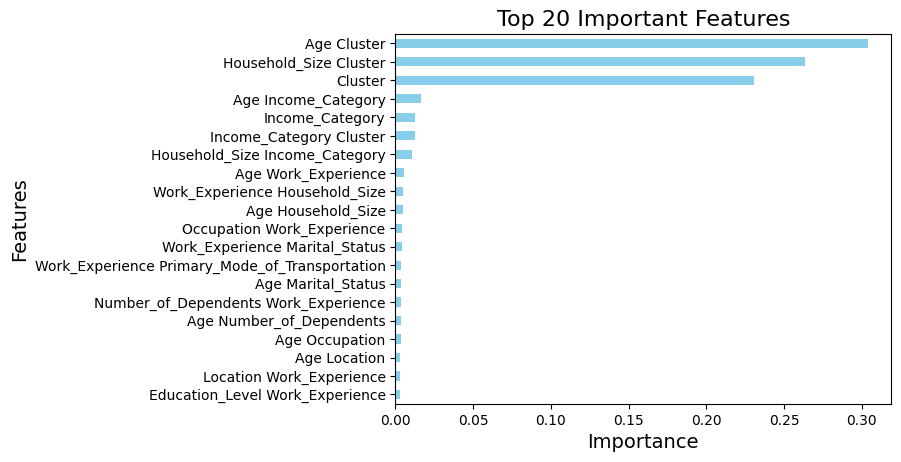

In [36]:
# Plot the top 20 important features
plt.figure(figsize=(12, 8))
top_20_features.plot(kind='barh', x='Feature', y='Importance', legend=False, color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 20 Important Features', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

### 4.1 Display Correlation with Income

In [39]:
income_correlation

Income                            1.000000
Homeownership_Status              0.062561
Number_of_Dependents              0.011413
Age                               0.008739
Age_Group                         0.006974
Employment_Status                 0.006549
Education_Level                   0.003974
Primary_Mode_of_Transportation   -0.000655
Occupation                       -0.001380
Gender                           -0.002218
Marital_Status                   -0.003970
Household_Size                   -0.011356
Type_of_Housing                  -0.026367
Work_Experience                  -0.027541
Location                         -0.055916
Income_Category                  -0.524863
Cluster                          -0.583223
Name: Income, dtype: float64

### 4.2 Plot Sorted Absolute Correlation with Income

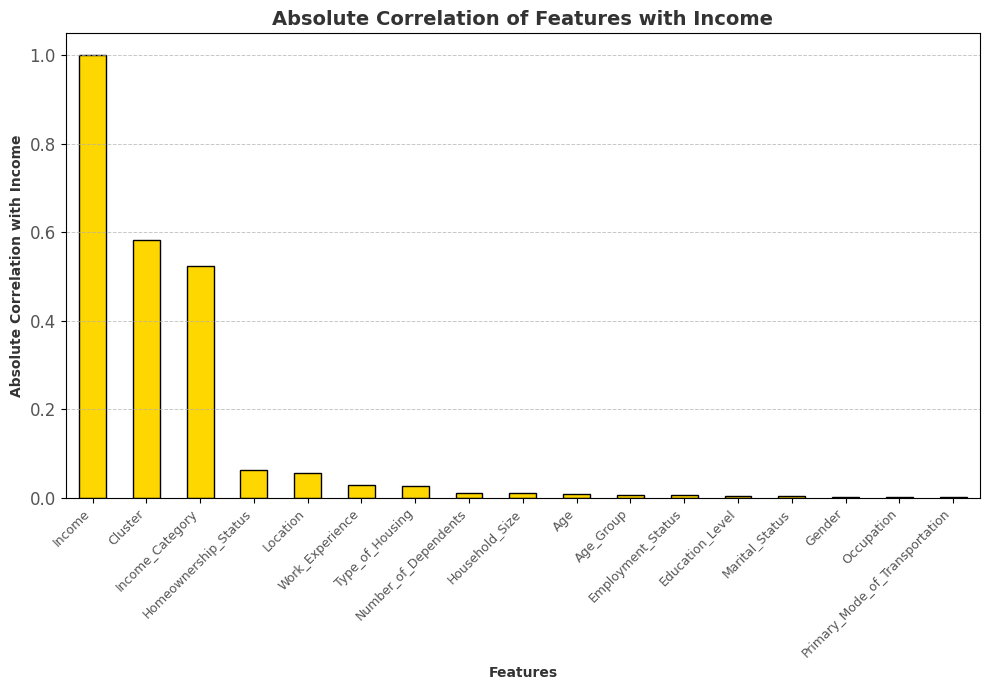

In [68]:
# Get absolute values of the correlations with Income and sort them in descending order
income_correlation_abs_sorted = income_correlation.abs().sort_values(ascending=False)

# Plot the absolute correlation with the target variable 'Income' with enhanced aesthetics
plt.figure(figsize=(10, 7))
income_correlation_abs_sorted.plot(kind='bar', color='gold', edgecolor='black')

# Title and labels with enhanced font properties
plt.title('Absolute Correlation of Features with Income', fontsize=14, weight='bold', color='#333333')
plt.xlabel('Features', fontsize=10, weight='bold', color='#333333')
plt.ylabel('Absolute Correlation with Income', fontsize=10, weight='bold', color='#333333')

# Enhancing tick labels
plt.xticks(rotation=45, ha='right', fontsize=9, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Adding grid with alpha for better visibility
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adding a tight layout to ensure no clipping
plt.tight_layout()

# Display the plot
plt.show()


### 5.1 Rename a Column Based on an Assumption

In [43]:
# Assumption that the Living Standard of a person is some what similar to it's Income Category
data.rename(columns={'Income_Category': 'Living_Standards'}, inplace=True)

### 5.2 List All Column Names After Renaming

In [44]:
data.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income', 'Age_Group',
       'Living_Standards', 'Cluster'],
      dtype='object')

### 5.3 Select Specific Columns for a New DataFrame

In [70]:
new_data = data[['Income', 'Living_Standards', 'Homeownership_Status', 'Location', 'Work_Experience', 'Type_of_Housing', 'Number_of_Dependents', 'Household_Size', 'Age', 'Employment_Status']]

### 5.4 Display the First 10 Rows of the New DataFrame

In [71]:
print(tabulate(new_data.head(10), headers='keys', tablefmt='pretty'))

+---+---------+------------------+----------------------+----------+-----------------+--------------------+----------------------+----------------+-----+-------------------+
|   | Income  | Living_Standards | Homeownership_Status | Location | Work_Experience |  Type_of_Housing   | Number_of_Dependents | Household_Size | Age | Employment_Status |
+---+---------+------------------+----------------------+----------+-----------------+--------------------+----------------------+----------------+-----+-------------------+
| 0 |  72510  |      Medium      |         Own          |  Urban   |       21        |     Apartment      |          5           |       7        | 56  |     Full-time     |
| 1 |  75462  |      Medium      |         Own          |  Urban   |        4        |     Apartment      |          0           |       7        | 69  |     Full-time     |
| 2 |  71748  |      Medium      |         Own          |  Urban   |        1        | Single-family home |          1           |

### 5.5 Save the New DataFrame to a CSV File

In [72]:
new_data.to_csv('data_cleaned.csv', index=False)